# Verifying that lateral GABA inhibtion affects firing rate in a population

In [1]:
%matplotlib inline

import os
network_path = os.path.join("..", "networks", "lateral_onepop")
simulation_file_no_synapses = os.path.join(network_path, "simulation", "output-no-synapses.hdf5")
duration = 5

# Plot network

Reading SNUDDA_DATA=../../../../../../BasalGangliaData/data/ from ../networks/lateral_onepop/network-config.json
Population unit 1 has 2000 neurons
Population unit 1 has 2000 neurons


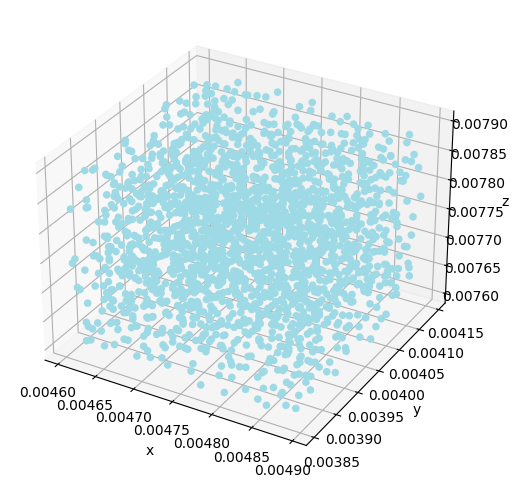

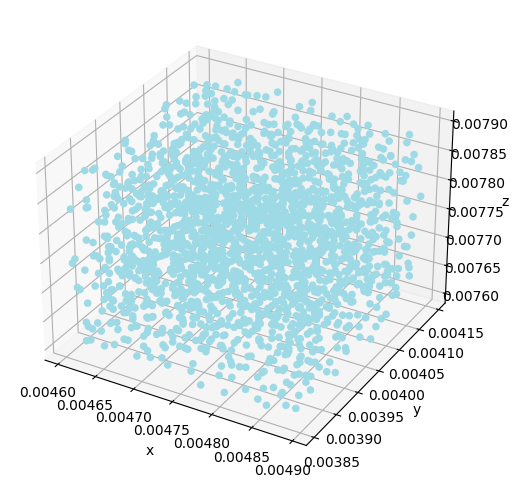

In [2]:
from snudda.plotting import PlotNetwork

pn = PlotNetwork(network_path)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

# Plot neuron input

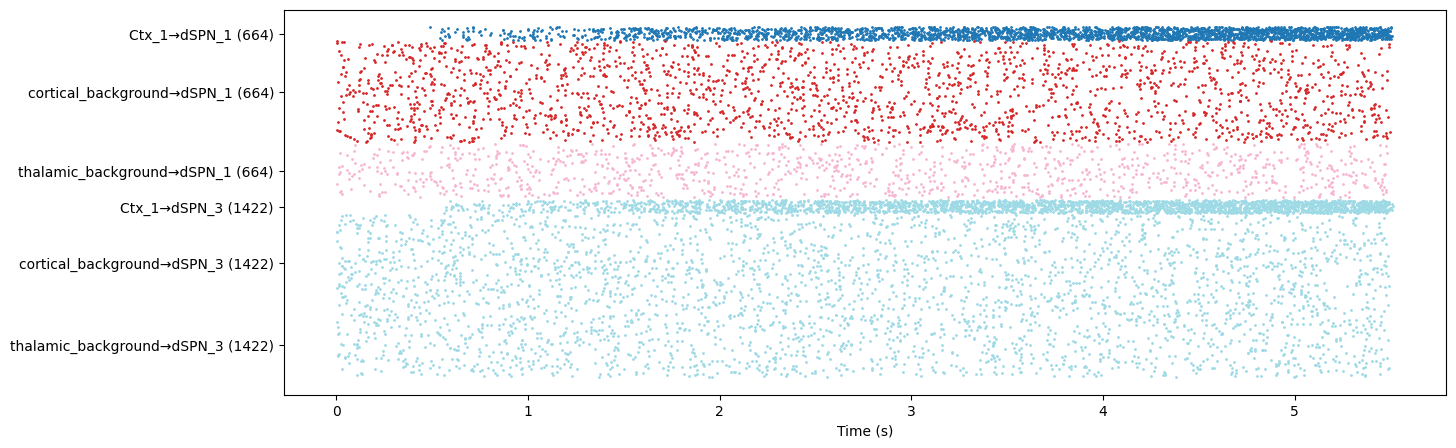

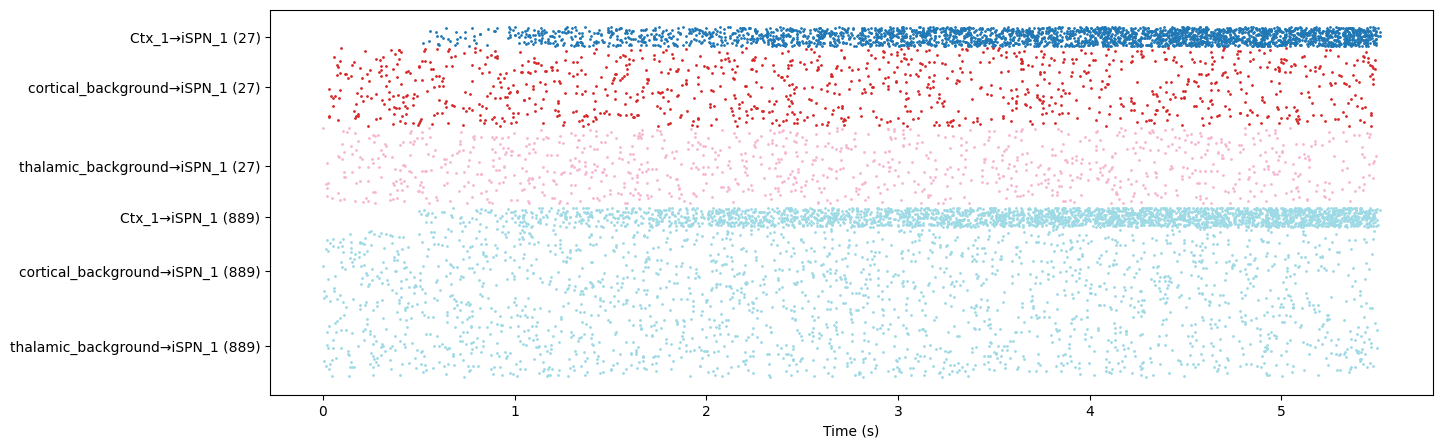

In [3]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, network_path)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=2, neuron_type="iSPN", fig_size=(15,5))

# Plot neuron activity

## With lateral inhibtion

Loading ../networks/lateral_onepop/simulation/output.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
69: (iSPN_0, p581376d6, mf2f3395e)
70: (iSPN_0, p635b801c, m3a845add)
89: (dSPN_2, pb267a31a, m7721d5cf)
163: (iSPN_0, p581376d6, md0f5647c)
190: (iSPN_0, p635b801c, m69613ef9)
239: (iSPN_0, p635b801c, md0f5647c)
266: (iSPN_0, pf721cf77, m3a845add)
325: (iSPN_0, p581376d6, md0f5647c)
342: (iSPN_0, p581376d6, md0f5647c)
373: (iSPN_0, pf721cf77, m3a845add)
395: (iSPN_0, p635b801c, md0f5647c)
397: (iSPN_0, p581376d6, m3a845add)
411: (dSPN_0, pb0529fb9, mbb8e5b24)
436: (iSPN_3, p57956f10, m1083058d)
444: (iSPN_0, p635b801c, m7bc82287)
466: (iSPN_0, p581376d6, m7bc82287)
507: (iSPN_0, pf721cf77, md0f5647c)
549: (iSPN_0, p581376d6, m3a845add)
571: (iSPN_0, p581376d6, mf2f3395e)
574: (iSPN_0, p635b801c, mf2f3395e)
590: (iSPN_0, pf721cf77, md0f5647c)
625: (iSPN_0, pf721cf77, md0f5647c)
651: (iSPN_0, p67dac726, m3a845add)
674: (iSPN_0, p581376d6, 

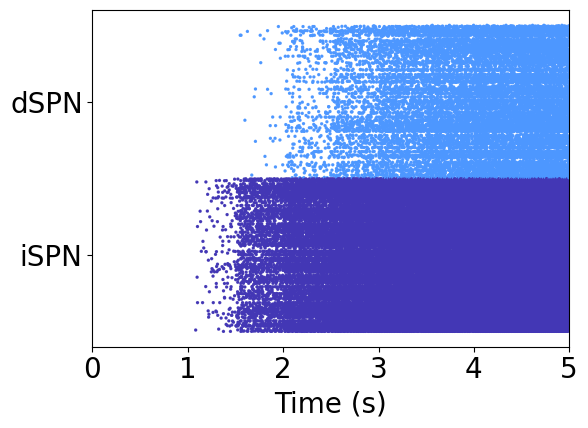

In [4]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure ../networks/lateral_onepop/figures/spike-frequency-pop-units1.pdf


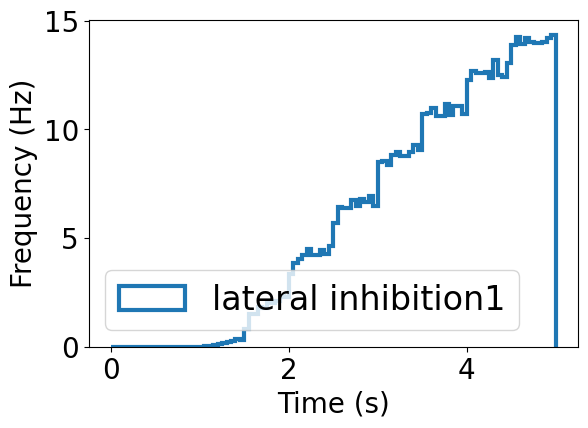

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [5]:
spr.plot_spike_histogram(label_text="lateral inhibition")

## Without lateral inhibition

Loading ../networks/lateral_onepop/simulation/output-no-synapses.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
47: (iSPN_0, p039c9f4f, md0f5647c)
69: (iSPN_0, p581376d6, mf2f3395e)
70: (iSPN_0, p635b801c, m3a845add)
163: (iSPN_0, p581376d6, md0f5647c)
188: (iSPN_0, p635b801c, m6486ed26)
217: (iSPN_0, pf721cf77, md0f5647c)
282: (iSPN_0, p67dac726, mf2f3395e)
327: (iSPN_0, p581376d6, mf2f3395e)
342: (iSPN_0, p581376d6, md0f5647c)
372: (iSPN_0, p67dac726, mf2f3395e)
373: (iSPN_0, pf721cf77, m3a845add)
395: (iSPN_0, p635b801c, md0f5647c)
397: (iSPN_0, p581376d6, m3a845add)
421: (iSPN_0, p67dac726, mf2f3395e)
436: (iSPN_3, p57956f10, m1083058d)
442: (iSPN_0, p581376d6, mf2f3395e)
445: (iSPN_0, pf721cf77, m3a845add)
460: (dSPN_2, pb267a31a, m7721d5cf)
507: (iSPN_0, pf721cf77, md0f5647c)
527: (iSPN_0, p581376d6, mf2f3395e)
528: (iSPN_0, p635b801c, m3a845add)
549: (iSPN_0, p581376d6, m3a845add)
571: (iSPN_0, p581376d6, mf2f3395e)
574: (iSPN_0,

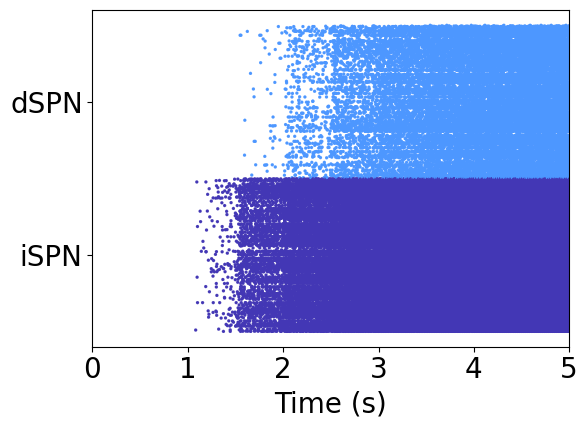

In [6]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr_no = SnuddaPlotSpikeRaster2(network_path=network_path, simulation_file=simulation_file_no_synapses)

spr_no.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure ../networks/lateral_onepop/figures/spike-frequency-pop-units1.pdf


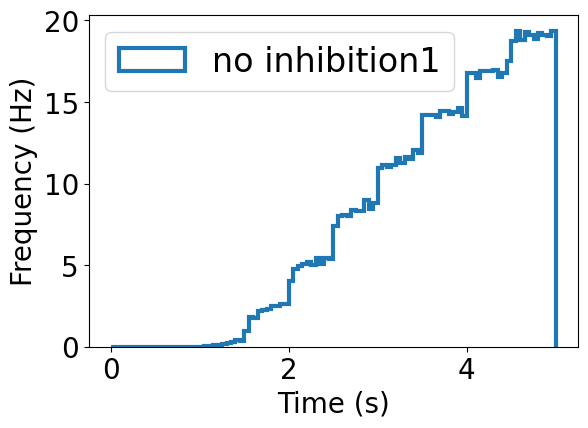

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [7]:
spr_no.plot_spike_histogram(label_text="no inhibition")